# **Detecting Diabetes using Logistic Regression and Support Vector Machine (SVM)**

# Importing Libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [112]:
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Understanding the Data

In [113]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [114]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [115]:
df.shape

(768, 9)

In [116]:
df.size

6912

In [117]:
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [118]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [121]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [122]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


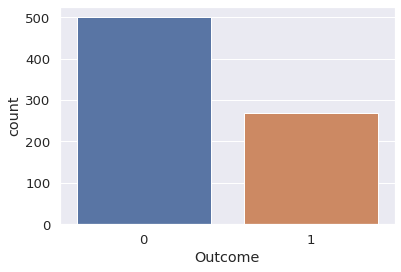

In [123]:
sns.countplot(df['Outcome'],label="Count")

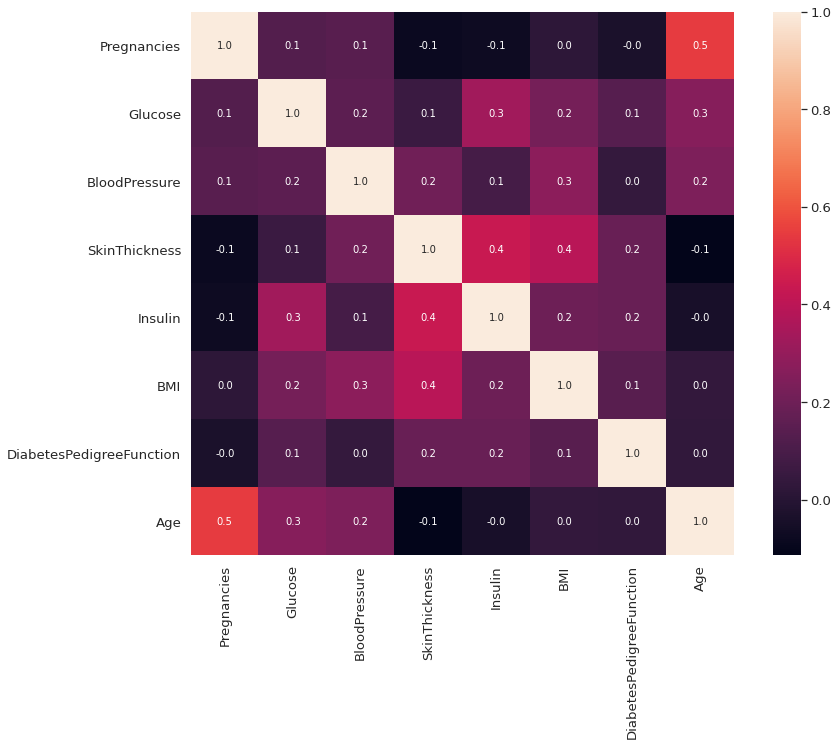

In [124]:
plt.figure(figsize=(14,10))
sns.set(style='whitegrid', context='notebook')
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size': 10},yticklabels=cols,xticklabels=cols)
plt.show()

# Splitting of dataset into dependent and independent variables

In [125]:
X = df[cols] # Features
Y = df.Outcome # Target variable

In [126]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [127]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Splitting the data in Training and Testing

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)
# X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], stratify=df['Outcome'], random_state=66)

# Classification

In [129]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state=2)
lm.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [130]:
Y_pred_train = lm.predict(X_train) #Actual = Y_train
Y_pred_test = lm.predict(X_test) #Actual = Y_test
print(Y_pred_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [131]:
df = pd.DataFrame(Y_pred_test, Y_test)
df.head()

,0
Outcome,
1,1
0,0
0,0
1,1
0,0


## Confusion Matrix

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_test)
cm

array([[98,  9],
       [18, 29]])

Text(0.5, 9.5, 'Predicted label')

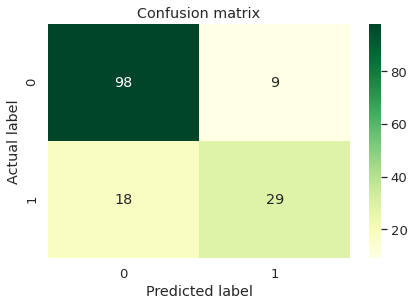

In [133]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Accuracy

In [134]:
from sklearn.metrics import accuracy_score
print("Accuracy of training data:", accuracy_score(Y_train, Y_pred_train))
print("Accuracy of testing data:", accuracy_score(Y_test, Y_pred_test))

Accuracy of training data: 0.7719869706840391
Accuracy of testing data: 0.8246753246753247


# Support Vector Machine

In [135]:
from sklearn.svm import SVC

In [136]:
model = SVC()
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Prediction

In [137]:
ypred = model.predict(X_test)

## Confusion Matrix

In [138]:
cmt = np.array(confusion_matrix(Y_test, ypred))
cmt

array([[98,  9],
       [23, 24]])

Text(0.5, 9.5, 'Predicted label')

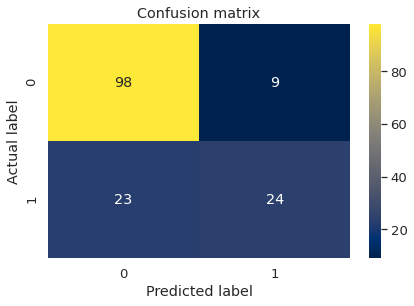

In [139]:
sns.heatmap(pd.DataFrame(cmt), annot=True, cmap="cividis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Accuracy

In [140]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, ypred))

Accuracy: 0.7922077922077922


In [141]:
model_c = SVC(C=10)
model_c.fit(X_train, Y_train)
print("Accuracy of training data:", model_c.score(X_train, Y_train))
print("Accuracy of testing data:", model_c.score(X_test, Y_test))

Accuracy of training data: 0.7736156351791531
Accuracy of testing data: 0.8116883116883117


# Saving the model

In [142]:
import pickle
import os
#Saving the model (Classifier)
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/logistic_reg.sav"
pickle.dump(lm, open(MODEL_PATH, 'wb'))

In [143]:
#Saving the model (SVM)
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/svm.sav"
pickle.dump(model, open(MODEL_PATH, 'wb'))

# Comparision between both models

In [152]:
data = [[6,	150,	72,	0,	0,	33.6,	0.627,	50]]
  
df = pd.DataFrame(data, columns = [cols]) 

new_pred_reg = lm.predict(df)
new_pred_reg

array([1])

In [153]:
data = [[6,	150,	72,	0,	0,	33.6,	0.627,	50]]
  
df = pd.DataFrame(data, columns = [cols]) 

new_pred_svm = model_c.predict(df)
new_pred_svm

array([1])



---

